In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin#两个序列中距离匹配
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt


In [6]:
china = load_sample_image('china.jpg')

In [9]:
china.dtype#这是一种图片的格式

dtype('uint8')

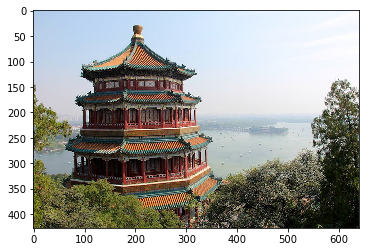

In [7]:
plt.imshow(china)

In [16]:
newimg = china.reshape((china.shape[0] * china.shape[1], china.shape[2]))
import pandas as pd
pd.DataFrame(newimg).drop_duplicates()
#查看了有多少重复颜色，即行相同

,0,1,2
0,174,201,231
8,173,202,232
9,172,201,231
15,174,203,233
16,175,204,234
...,...,...,...
273204,28,51,23
273207,101,111,77
273208,69,82,64
273209,46,50,36


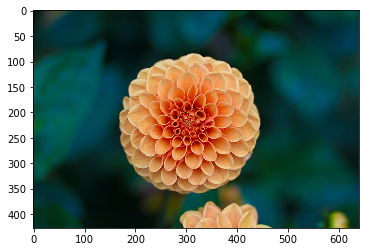

In [18]:
flower = load_sample_image("flower.jpg")
plt.imshow(flower)

## 矢量压缩
使用64种质心去替代9万种未重复的颜色

In [19]:
n_clusters = 64
china = np.array(china, dtype=np.float) / china.max()#将其归一化到[0, 1]
w, h, c = original_shape = tuple(china.shape)
assert c==3 
image_array = np.reshape(china, (w * h, c))

In [41]:
#先随机抽取1000个数据来寻找质心
from sklearn.metrics import silhouette_score
image_1000 = shuffle(image_array, random_state=0)[:1000]
clusters = KMeans(n_clusters=64, random_state=0).fit(image_1000)

In [26]:
silhouette_score(image_1000, clusters.labels_)

0.34319733161559784

用质心来替换掉原有样本

In [44]:
labels = clusters.predict(image_array)
image_k = image_array.copy()

In [46]:
labels.shape

(273280,)

In [47]:
for i in range(labels.shape[0]):
    image_k[i] = clusters.cluster_centers_[labels[i]]

In [48]:
pd.DataFrame(image_k).drop_duplicates().shape

(64, 3)

In [49]:
image_kmeans = np.reshape(image_k, (w, h, c))
image_kmeans.shape

(427, 640, 3)

随机抽取质心来分簇

In [52]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_ = pairwise_distances_argmin(centroid_random, image_array, axis=0)
#返回x2离x1中最近的点的索引

In [53]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_[i]]

In [54]:
image_random = image_random.reshape(w, h, c)

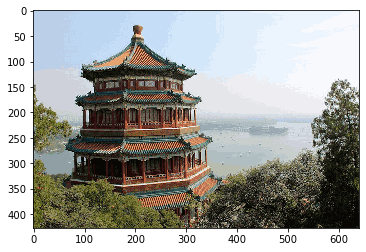

In [56]:
plt.imshow(image_kmeans)